# v 1.8 debugging freq modul..
cont from versions 240825 JLA
https://chatgpt.com/share/1f05c2e3-d3c5-40ba-a369-510b4aead7a4


In [3]:
"""
Script Name: Nonlinear Modulation Sequence Generator
Version ID: 1.8
Date: 2024-08-23
Author: JukkaTLinjama
File Name: placeholder_for_filename.py
Link to ChatGPT conversation: placeholder_for_link

Description:
This script generates a sequence based on amplitude and frequency modulation,
visualizes the sequence along with its modulation functions, and allows saving
the generated sequence to a CSV file with three significant digits. The sequence generator is modular,
with separate functions for amplitude and frequency modulation and final signal generation.

Libraries: numpy, matplotlib, pandas, ipywidgets

Usage:
1. Adjust the sliders to set your desired sequence parameters.
2. The sequence will be plotted automatically along with modulation values.
3. Click the "Save Sequence to CSV" button to save the current sequence to a CSV file.
"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ipywidgets import interact, FloatSlider, Button, Output, Text, Layout, HBox, VBox
from IPython.display import display, clear_output

def amplitude_modulation(t, amp_mod_freq, amp_mod_index, amp_phase):
    """
    Linear amplitude modulation function.
    """
    return 1 + amp_mod_index * np.sin(2 * np.pi * amp_mod_freq * t + amp_phase)

def frequency_modulation(t, freq_mod_freq, freq_mod_index, freq_phase):
    """
    Linear frequency modulation function.
    """
    freq_mod = np.sin(2 * np.pi * freq_mod_freq * t + freq_phase)
    return 1 + freq_mod_index * freq_mod

def generate_sequence(length, dt, amp_mod_freq, freq_mod_freq, amp_mod_index, freq_mod_index, 
                      amp_phase=0.0, freq_phase=0.0, base_frequency=0.5, amplitude=100):
    """
    Generates a sequence using linear amplitude and frequency modulation functions.
    Also tracks frequency modulation values for debugging.
    """
    length = int(length)  # Ensure length is an integer
    sequence = []
    freq_mod_tracking = []  # Track frequency modulation values for debugging
    times = np.arange(length) * dt
    
    for i in range(length):
        time = times[i]
        
        # Modulation functions
        amp_mod_value = amplitude_modulation(time, amp_mod_freq, amp_mod_index, amp_phase)
        freq_mod_value = frequency_modulation(time, freq_mod_freq, freq_mod_index, freq_phase)
        
        # Track the frequency modulation value
        freq_mod_tracking.append(freq_mod_value)
        
        # Signal generation using the modulation values with base frequency in sine wave
        sine_wave = np.sin(2 * np.pi * base_frequency * freq_mod_value * time)
        value = amplitude * amp_mod_value * sine_wave
        
        # Storing the result and modulation values
        sequence.append({
            'value': value,
            'amplitude_modulation': amp_mod_value,
            'frequency_modulation': freq_mod_value
        })
    
    return sequence, times, freq_mod_tracking

def plot_sequence(sequence, times, base_frequency, dt, freq_mod_tracking, title="Sequence"):
    values = [point['value'] for point in sequence]
    amplitude_modulations = [point['amplitude_modulation'] for point in sequence]
    rms_value = np.sqrt(np.mean(np.square(values)))

    plt.figure(figsize=(14, 14))
    
    # Plot the main sequence
    plt.subplot(5, 1, 1)
    plt.plot(times, values, label="Main Sequence")
    plt.title(title)
    plt.xlabel("Time (s)")
    plt.ylabel("Value")
    plt.grid(True)
    plt.legend()
    
    # Combined amplitude modulation and frequency modulation tracking
    plt.subplot(5, 1, 2)
    plt.plot(times, amplitude_modulations, color='orange', label="Amplitude Modulation")
    plt.plot(times, freq_mod_tracking, color='green', label="Frequency Modulation (Tracking)")
    plt.title("Amplitude and Frequency Modulation (Tracking)")
    plt.xlabel("Time (s)")
    plt.ylabel("Modulation Value")
    plt.grid(True)
    plt.legend()
    
    # Plot the amplitude histogram (smaller)
    plt.subplot(5, 1, 3)
    plt.hist(values, bins=50, color='blue', alpha=0.7)
    plt.title(f"Amplitude Histogram (RMS Value: {rms_value:.3f})")
    plt.xlabel("Amplitude")
    plt.ylabel("Frequency")
    plt.grid(True)

    # Plot the actual modulated sine wave
    plt.subplot(5, 1, 4)
    plt.plot(times, np.sin(2 * np.pi * base_frequency * np.array(freq_mod_tracking) * times), label="Modulated Sine Wave")
    plt.title("Actual Modulated Sine Wave")
    plt.xlabel("Time (s)")
    plt.ylabel("Value")
    plt.grid(True)
    plt.legend()

    # Frequency analysis (magnitude spectrum) in log-log scale
    plt.subplot(5, 1, 5)
    n = len(values)
    freqs = np.fft.fftfreq(n, d=dt)
    magnitudes = np.abs(np.fft.fft(values))
    plt.loglog(freqs[:n//2], magnitudes[:n//2], label="Magnitude Spectrum")
    plt.title("Frequency Analysis (Magnitude Spectrum)")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.grid(True)
    plt.legend()

    # Plot frequency modulation tracking for debugging
    plt.figure(figsize=(10, 4))
    plt.plot(times, freq_mod_tracking, color='red', label="Frequency Modulation Tracking")
    plt.title("Frequency Modulation Tracking")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency Modulation Value")
    plt.grid(True)
    plt.legend()
    plt.show()

    # Add the version ID, date, and modulation calculation math as a small text
    plt.figtext(0.5, 0.01, f"Version ID: 1.8 | Date: 2024-08-23 | Modulation Calculation: "
                          "Amplitude = 1 + amp_mod_index * sin(2π * amp_mod_freq * t + amp_phase), "
                          "Frequency = base_frequency * (1 + freq_mod_index * sin(2π * freq_mod_freq * t + freq_phase))",
                ha="center", fontsize=8, wrap=True)
    
    plt.tight_layout()
    plt.show()

# Define sliders for interactive control with wider layout
slider_layout = Layout(width='240px')
length_slider = FloatSlider(min=100, max=1000, step=10, value=500, description="Length:", layout=slider_layout)
dt_slider = FloatSlider(min=0.01, max=0.1, step=0.01, value=0.02, description="dt:", layout=slider_layout)
amp_mod_freq_slider = FloatSlider(min=0.1, max=5.0, step=0.1, value=0.5, description="Amp Mod Freq:", layout=slider_layout)
freq_mod_freq_slider = FloatSlider(min=0.1, max=5.0, step=0.1, value=0.5, description="Freq Mod Freq:", layout=slider_layout)
amp_mod_index_slider = FloatSlider(min=0.0, max=0.5, step=0.01, value=0.25, description="Amp Mod Index:", layout=slider_layout)
freq_mod_index_slider = FloatSlider(min=0.0, max=0.5, step=0.01, value=0.25, description="Freq Mod Index:", layout=slider_layout)
amp_phase_slider = FloatSlider(min=0.0, max=2*np.pi, step=0.1, value=0.0, description="Amp Phase:", layout=slider_layout)
freq_phase_slider = FloatSlider(min=0.0, max=2*np.pi, step=0.1, value=0.0, description="Freq Phase:", layout=slider_layout)
base_frequency_slider = FloatSlider(min=0.1, max=5.0, step=0.1, value=0.5, description="Base Frequency:", layout=slider_layout)

# Organize sliders in two columns
column_1 = VBox([length_slider, dt_slider, amp_mod_freq_slider, freq_mod_freq_slider, base_frequency_slider])
column_2 = VBox([amp_mod_index_slider, freq_mod_index_slider, amp_phase_slider, freq_phase_slider])

# Output area for plotting
output = Output()

def update_plot(length, dt, amp_mod_freq, freq_mod_freq, amp_mod_index, freq_mod_index, amp_phase, freq_phase, base_frequency):
    with output:
        clear_output(wait=True)
        sequence, times, freq_mod_tracking = generate_sequence(length, dt, amp_mod_freq, freq_mod_freq, amp_mod_index, freq_mod_index, amp_phase, freq_phase, base_frequency)
        plot_sequence(sequence, times, base_frequency, dt, freq_mod_tracking, title="Generated Sequence")
        return sequence

# Create the interactive plot
interactive_plot = interact(update_plot, 
                            length=length_slider, 
                            dt=dt_slider, 
                            amp_mod_freq=amp_mod_freq_slider, 
                            freq_mod_freq=freq_mod_freq_slider, 
                            amp_mod_index=amp_mod_index_slider, 
                            freq_mod_index=freq_mod_index_slider,
                            amp_phase=amp_phase_slider,
                            freq_phase=freq_phase_slider,
                            base_frequency=base_frequency_slider)

display(HBox([column_1, column_2]), output)

def save_sequence_to_csv(sequence, filename="target_sequence.csv"):
    """
    Saves the generated sequence to a CSV file with three significant digits.
    """
    data = [{'Value': round(point['value'], 3), 
             'Amplitude_Modulation': round(point['amplitude_modulation'], 3), 
             'Frequency_Modulation': round(point['frequency_modulation'], 3)} 
            for point in sequence]
    
    df = pd.DataFrame(data)
    df.to_csv(filename, index=False)
    print(f"Sequence saved to {filename} with three significant digits.")

# Add a text box for filename prompt and a button to save the sequence
filename_textbox = Text(value="target_sequence.csv", description="File name:", layout=Layout(width='300px'))
save_button = Button(description="Save Sequence to CSV")

def on_save_button_clicked(b):
    sequence = update_plot(length_slider.value, dt_slider.value, 
                           amp_mod_freq_slider.value, freq_mod_freq_slider.value, 
                           amp_mod_index_slider.value, freq_mod_index_slider.value, 
                           amp_phase_slider.value, freq_phase_slider.value, 
                           base_frequency_slider.value)
    
    # Use the entered filename or fall back to default
    filename = filename_textbox.value if filename_textbox.value.strip() != "" else "target_sequence.csv"
    save_sequence_to_csv(sequence, filename)

save_button.on_click(on_save_button_clicked)
display(filename_textbox, save_button)


interactive(children=(FloatSlider(value=500.0, description='Length:', layout=Layout(width='240px'), max=1000.0…

Output()

Text(value='target_sequence.csv', description='File name:', layout=Layout(width='300px'))

Button(description='Save Sequence to CSV', style=ButtonStyle())

## korjattu fm modul... yritys

In [21]:
"""
Script Name: Nonlinear Modulation Sequence Generator
Version ID: 1.12
Date: 2024-08-23
Author: JukkaTLinjama
File Name: placeholder_for_filename.py
Link to ChatGPT conversation: placeholder_for_link

Description:
This script generates a sequence based on amplitude and frequency modulation,
visualizes the sequence along with its modulation functions, and allows saving
the generated sequence to a CSV file with three significant digits. The sequence generator is modular,
with separate functions for amplitude and frequency modulation and final signal generation.

Libraries: numpy, matplotlib, pandas, ipywidgets

Usage:
1. Adjust the sliders to set your desired sequence parameters.
2. The sequence will be plotted automatically along with modulation values.
3. Click the "Save Sequence to CSV" button to save the current sequence to a CSV file.
"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ipywidgets import interact, FloatSlider, Button, Output, Text, Layout, HBox, VBox
from IPython.display import display, clear_output

def amplitude_modulation(t, amp_mod_freq, amp_mod_index, amp_phase):
    """
    Linear amplitude modulation function.
    """
    return 1 + amp_mod_index * np.sin(2 * np.pi * amp_mod_freq * t + amp_phase)

def frequency_modulation(t, base_frequency, freq_mod_freq, freq_mod_index, freq_phase):
    """
    Frequency modulation using the correct FM logic.
    
    Parameters:
    - t: Time array.
    - base_frequency (f_c): Carrier frequency.
    - freq_mod_freq (f_m): Modulating frequency.
    - freq_mod_index (beta): Modulation index.
    - freq_phase: Initial phase of frequency modulation.
    
    Returns:
    - s_t: Frequency modulated signal.
    """
    # Modulating signal m(t)
    m_t = np.cos(2 * np.pi * freq_mod_freq * t)
    
    # Instantaneous phase theta(t)
    theta_t = 2 * np.pi * base_frequency * t + freq_mod_index * np.sin(2 * np.pi * freq_mod_freq * t + freq_phase)
    
    # FM signal s(t)
    s_t = np.cos(theta_t)
    
    return s_t

def generate_sequence(length, dt, amp_mod_freq, base_frequency, freq_mod_freq, amp_mod_index, freq_mod_index, 
                      amp_phase=0.0, freq_phase=0.0, amplitude=100):
    """
    Generates a sequence using amplitude modulation and the correct frequency modulation logic.
    Also tracks frequency modulation values for debugging.
    """
    length = int(length)  # Ensure length is an integer
    sequence = []
    freq_mod_tracking = []  # Track frequency modulation values for debugging
    times = np.arange(length) * dt
    
    for i in range(length):
        time = times[i]
        
        # Modulation functions
        amp_mod_value = amplitude_modulation(time, amp_mod_freq, amp_mod_index, amp_phase)
        freq_mod_value = frequency_modulation(time, base_frequency, freq_mod_freq, freq_mod_index, freq_phase)
        
        # Track the frequency modulation value
        freq_mod_tracking.append(freq_mod_value)
        
        # Signal generation using the modulation values with base frequency in sine wave
        value = amplitude * amp_mod_value * freq_mod_value
        
        # Storing the result and modulation values
        sequence.append({
            'value': value,
            'amplitude_modulation': amp_mod_value,
            'frequency_modulation': freq_mod_value
        })
    
    return sequence, times, freq_mod_tracking

def plot_sequence(sequence, times, dt, freq_mod_tracking, title="Generated Sequence"):
    values = [point['value'] for point in sequence]
    amplitude_modulations = [point['amplitude_modulation'] for point in sequence]
    rms_value = np.sqrt(np.mean(np.square(values)))

    plt.figure(figsize=(14, 14))
    
    # Plot the main sequence
    plt.subplot(5, 1, 1)
    plt.plot(times, values, label="Main Sequence")
    plt.title(title)
    plt.xlabel("Time (s)")
    plt.ylabel("Value")
    plt.grid(True)
    plt.legend()
    
    # Combined amplitude modulation and frequency modulation tracking
    plt.subplot(5, 1, 2)
    plt.plot(times, amplitude_modulations, color='orange', label="Amplitude Modulation")
    plt.plot(times, freq_mod_tracking, color='green', label="Frequency Modulation (Tracking)")
    plt.title("Amplitude and Frequency Modulation (Tracking)")
    plt.xlabel("Time (s)")
    plt.ylabel("Modulation Value")
    plt.grid(True)
    plt.legend()
    
    # Plot the amplitude histogram (smaller)
    plt.subplot(5, 1, 3)
    plt.hist(values, bins=50, color='blue', alpha=0.7)
    plt.title(f"Amplitude Histogram (RMS Value: {rms_value:.3f})")
    plt.xlabel("Amplitude")
    plt.ylabel("Frequency")
    plt.grid(True)

    # Plot the actual modulated sine wave
    plt.subplot(5, 1, 4)
    plt.plot(times, freq_mod_tracking, label="Frequency Modulated Signal")
    plt.title("Frequency Modulated Signal")
    plt.xlabel("Time (s)")
    plt.ylabel("Value")
    plt.grid(True)
    plt.legend()

    # Frequency analysis (magnitude spectrum) in log-log scale
    plt.subplot(5, 1, 5)
    n = len(values)
    freqs = np.fft.fftfreq(n, d=dt)
    magnitudes = np.abs(np.fft.fft(values))
    plt.loglog(freqs[:n//2], magnitudes[:n//2], label="Magnitude Spectrum")
    plt.title("Frequency Analysis (Magnitude Spectrum)")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.grid(True)
    plt.legend()

    # Plot frequency modulation tracking for debugging
    plt.figure(figsize=(10, 4))
    plt.plot(times, freq_mod_tracking, color='red', label="Frequency Modulation Tracking")
    plt.title("Frequency Modulation Tracking")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency Modulation Value")
    plt.grid(True)
    plt.legend()
    plt.show()

    # Add the version ID, date, and modulation calculation math as a small text
    plt.figtext(0.5, 0.01, f"Version ID: 1.12 | Date: 2024-08-23 | Modulation Calculation: "
                          "Amplitude = 1 + amp_mod_index * sin(2π * amp_mod_freq * t + amp_phase), "
                          "Frequency = base_frequency * (1 + freq_mod_index * sin(2π * freq_mod_freq * t + freq_phase))",
                ha="center", fontsize=8, wrap=True)
    
    plt.tight_layout()
    plt.show()

# Define sliders for interactive control with wider layout
slider_layout = Layout(width='240px')
length_slider = FloatSlider(min=100, max=1000, step=10, value=500, description="Length:", layout=slider_layout)
dt_slider = FloatSlider(min=0.01, max=0.1, step=0.01, value=0.02, description="dt:", layout=slider_layout)

# Amplitude modulation sliders
amp_mod_freq_slider = FloatSlider(min=0.1, max=5.0, step=0.1, value=0.5, description="Amp Mod Freq:", layout=slider_layout)
amp_mod_index_slider = FloatSlider(min=0.0, max=0.5, step=0.01, value=0.25, description="Amp Mod Index:", layout=slider_layout)
amp_phase_slider = FloatSlider(min=0.0, max=2*np.pi, step=0.1, value=0.0, description="Amp Phase:", layout=slider_layout)

# Frequency modulation sliders
freq_mod_freq_slider = FloatSlider(min=0.1, max=5.0, step=0.1, value=0.5, description="Freq Mod Freq:", layout=slider_layout)
freq_mod_index_slider = FloatSlider(min=0.0, max=0.5, step=0.01, value=0.25, description="Freq Mod Index:", layout=slider_layout)
freq_phase_slider = FloatSlider(min=0.0, max=2*np.pi, step=0.1, value=0.0, description="Freq Phase:", layout=slider_layout)
base_frequency_slider = FloatSlider(min=0.1, max=5.0, step=0.1, value=0.5, description="Base Frequency:", layout=slider_layout)

# Grouping sliders for amplitude and frequency modulation, and sequence control
amp_mod_group = VBox([amp_mod_freq_slider, amp_mod_index_slider, amp_phase_slider])
freq_mod_group = VBox([freq_mod_freq_slider, freq_mod_index_slider, freq_phase_slider, base_frequency_slider])
seq_control_group = VBox([length_slider, dt_slider])

# Output area for plotting
output = Output()

def update_plot(length, dt, amp_mod_freq, freq_mod_freq, amp_mod_index, freq_mod_index, amp_phase, freq_phase, base_frequency):
    with output:
        clear_output(wait=True)
        sequence, times, freq_mod_tracking = generate_sequence(length, dt, amp_mod_freq, base_frequency, freq_mod_freq, amp_mod_index, freq_mod_index, amp_phase, freq_phase)
        plot_sequence(sequence, times, dt, freq_mod_tracking, title="Generated Sequence")
        return sequence

# Create the interactive plot
interactive_plot = interact(update_plot, 
                            length=length_slider, 
                            dt=dt_slider, 
                            amp_mod_freq=amp_mod_freq_slider, 
                            freq_mod_freq=freq_mod_freq_slider, 
                            amp_mod_index=amp_mod_index_slider, 
                            freq_mod_index=freq_mod_index_slider,
                            amp_phase=amp_phase_slider,
                            freq_phase=freq_phase_slider,
                            base_frequency=base_frequency_slider)

# Display grouped sliders and output
display(HBox([seq_control_group, amp_mod_group, freq_mod_group]), output)

def save_sequence_to_csv(sequence, filename="target_sequence.csv"):
    """
    Saves the generated sequence to a CSV file with three significant digits.
    """
    data = [{'Value': round(point['value'], 3), 
             'Amplitude_Modulation': round(point['amplitude_modulation'], 3), 
             'Frequency_Modulation': round(point['frequency_modulation'], 3)} 
            for point in sequence]
    
    df = pd.DataFrame(data)
    df.to_csv(filename, index=False)
    print(f"Sequence saved to {filename} with three significant digits.")

# Add a text box for filename prompt and a button to save the sequence
filename_textbox = Text(value="target_sequence.csv", description="File name:", layout=Layout(width='300px'))
save_button = Button(description="Save Sequence to CSV")

def on_save_button_clicked(b):
    sequence = update_plot(length_slider.value, dt_slider.value, 
                           amp_mod_freq_slider.value, freq_mod_freq_slider.value, 
                           amp_mod_index_slider.value, freq_mod_index_slider.value, 
                           amp_phase_slider.value, freq_phase_slider.value, 
                           base_frequency_slider.value)
    
    # Use the entered filename or fall back to default
    filename = filename_textbox.value if filename_textbox.value.strip() != "" else "target_sequence.csv"
    save_sequence_to_csv(sequence, filename)

save_button.on_click(on_save_button_clicked)
display(filename_textbox, save_button)

# Proposed Function for Time Warping with Frequency Modulation (Not Implemented)

def time_warping_with_frequency_modulation(sequence, freq_mod_values, dt, start_time, time_length):
    """
    This function proposes to apply time warping based on the inverse of frequency modulation values.
    The time warping would be done by adjusting the time steps according to the inverse of the frequency modulation values.
    Additionally, this function allows selecting a sub-sequence based on start time and length,
    and applies a cosine time weighting function.

    Parameters:
    - sequence: The original sequence generated by amplitude modulation.
    - freq_mod_values: The frequency modulation values used to warp the time.
    - dt: The time step used for the original sequence.
    - start_time: The start time for the warped sequence.
    - time_length: The length of time for the warped sequence.

    Returns:
    - warped_sequence: The sequence after applying time warping and cosine weighting.
    - warped_times: The time steps after warping.
    """
    # Compute the inverse frequency modulation for time warping
    inverse_freq_mod = 1.0 / np.array(freq_mod_values)
    
    # Cumulative sum to create warped times
    warped_times = np.cumsum(inverse_freq_mod) * dt
    
    # Select the sub-sequence based on start_time and time_length
    mask = (warped_times >= start_time) & (warped_times <= start_time + time_length)
    selected_times = warped_times[mask]
    selected_sequence = np.array([point['value'] for point in sequence])[mask]
    
    # Apply cosine time weighting
    cosine_weight = np.cos(np.linspace(0, np.pi, len(selected_sequence)))
    warped_sequence = selected_sequence * cosine_weight
    
    return warped_sequence, selected_times


interactive(children=(FloatSlider(value=500.0, description='Length:', layout=Layout(width='240px'), max=1000.0…

Output()

Text(value='target_sequence.csv', description='File name:', layout=Layout(width='300px'))

Button(description='Save Sequence to CSV', style=ButtonStyle())

Sequence saved to target_sequence.csv with three significant digits.


Sequence saved to target_sequence.csv with three significant digits.


## freq modulation test

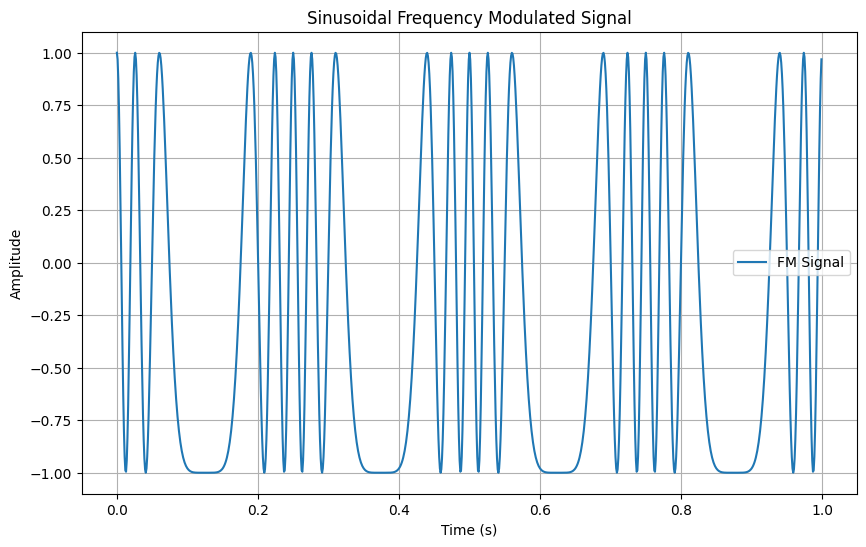

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
A_c = 1.0           # Amplitude of the carrier
f_c = 20.0         # Carrier frequency (in Hz)
f_m = 4
.0           # Modulating frequency (in Hz)
beta = 5.0          # Modulation index
duration = 1.0      # Duration of the signal (in seconds)
sampling_rate = 1000.0  # Sampling rate (samples per second)

# Time vector
t = np.arange(0, duration, 1/sampling_rate)

# Modulating signal (m(t) = cos(2 * pi * f_m * t))
m_t = np.cos(2 * np.pi * f_m * t)

# Instantaneous frequency deviation
f_t = f_c + beta * f_m * m_t

# Instantaneous phase (theta(t))
theta_t = 2 * np.pi * f_c * t + beta * np.sin(2 * np.pi * f_m * t)

# FM signal
s_t = A_c * np.cos(theta_t)

# Plotting the signal
plt.figure(figsize=(10, 6))
plt.plot(t, s_t, label="FM Signal")
plt.title("Sinusoidal Frequency Modulated Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()


## ei toimi vieläkäään... taitaa kuitenkin toimia!

In [44]:
"""
Script Name: Nonlinear Modulation Sequence Generator
Version ID: 1.13
Date: 2024-08-23
Author: JukkaTLinjama
File Name: placeholder_for_filename.py
Link to ChatGPT conversation: placeholder_for_link

Description:
This script generates a sequence based on amplitude and frequency modulation,
visualizes the sequence along with its modulation functions, and allows saving
the generated sequence to a CSV file with three significant digits. The sequence generator is modular,
with separate functions for amplitude and frequency modulation and final signal generation.

Libraries: numpy, matplotlib, pandas, ipywidgets

Usage:
1. Adjust the sliders to set your desired sequence parameters.
2. The sequence will be plotted automatically along with modulation values.
3. Click the "Save Sequence to CSV" button to save the current sequence to a CSV file.
"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ipywidgets import interact, FloatSlider, Button, Output, Text, Layout, HBox, VBox
from IPython.display import display, clear_output

def amplitude_modulation(t, amp_mod_freq, amp_mod_index, amp_phase):
    """
    Linear amplitude modulation function.
    """
    return 1 + amp_mod_index * np.sin(2 * np.pi * amp_mod_freq * t + amp_phase)

def frequency_modulation(t, base_frequency, freq_mod_freq, freq_mod_index, freq_phase):
    """
    Frequency modulation using the correct FM logic with instantaneous frequency deviation.
    
    Parameters:
    - t: Time array.
    - base_frequency (f_c): Carrier frequency.
    - freq_mod_freq (f_m): Modulating frequency.
    - freq_mod_index (beta): Modulation index.
    - freq_phase: Initial phase of frequency modulation.
    
    Returns:
    - s_t: Frequency modulated signal.
    """
    # Modulating signal m(t)
    m_t = np.cos(2 * np.pi * freq_mod_freq * t)
    # print(m_t)
    # Instantaneous frequency deviation f(t)
    # f_t = base_frequency + freq_mod_index * freq_mod_freq * m_t
    # print(f_t)
    # Instantaneous phase theta(t)
    theta_t = 2 * np.pi * base_frequency * t + freq_mod_index * np.sin(2 * np.pi * freq_mod_freq * t + freq_phase)
    # print(theta_t)
    # FM signal s(t)
    s_t = np.cos(theta_t)
    
    return s_t

def generate_sequence(length, dt, amp_mod_freq, base_frequency, freq_mod_freq, amp_mod_index, freq_mod_index, 
                      amp_phase=0.0, freq_phase=0.0, amplitude=100):
    """
    Generates a sequence using amplitude modulation and the correct frequency modulation logic.
    """
    length = int(length)  # Ensure length is an integer
    sequence = []
    times = np.arange(length) * dt
    
    for i in range(length):
        time = times[i]
        
        # Modulation functions
        amp_mod_value = amplitude_modulation(time, amp_mod_freq, amp_mod_index, amp_phase)
        freq_mod_value = frequency_modulation(time, base_frequency, freq_mod_freq, freq_mod_index, freq_phase)
      #  print(freq_mod_value)
        
        # Signal generation using the modulation values with base frequency in sine wave
        value = amplitude * amp_mod_value * freq_mod_value
        
        # Storing the result and modulation values
        sequence.append({
            'value': value,
            'amplitude_modulation': amp_mod_value,
            'frequency_modulation': freq_mod_value
        })
    
    return sequence, times

def plot_sequence(sequence, times, dt, title="Generated Sequence"):
    values = [point['value'] for point in sequence]
    amplitude_modulations = [point['amplitude_modulation'] for point in sequence]
    rms_value = np.sqrt(np.mean(np.square(values)))

    plt.figure(figsize=(14, 14))
    
    # Plot the main sequence
    plt.subplot(4, 1, 1)
    plt.plot(times, values, label="Main Sequence")
    plt.title(title)
    plt.xlabel("Time (s)")
    plt.ylabel("Value")
    plt.grid(True)
    plt.legend()
    
    # Amplitude modulation tracking
    plt.subplot(4, 1, 2)
    plt.plot(times, amplitude_modulations, color='orange', label="Amplitude Modulation")
    plt.title("Amplitude Modulation")
    plt.xlabel("Time (s)")
    plt.ylabel("Modulation Value")
    plt.grid(True)
    plt.legend()
    
    # Plot the amplitude histogram (smaller)
    plt.subplot(4, 1, 3)
    plt.hist(values, bins=50, color='blue', alpha=0.7)
    plt.title(f"Amplitude Histogram (RMS Value: {rms_value:.3f})")
    plt.xlabel("Amplitude")
    plt.ylabel("Frequency")
    plt.grid(True)

    # Frequency analysis (magnitude spectrum) in log-log scale
    plt.subplot(4, 1, 4)
    n = len(values)
    freqs = np.fft.fftfreq(n, d=dt)
    magnitudes = np.abs(np.fft.fft(values))
    plt.loglog(freqs[:n//2], magnitudes[:n//2], label="Magnitude Spectrum")
    plt.title("Frequency Analysis (Magnitude Spectrum)")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.grid(True)
    plt.legend()

    # Add the version ID, date, and modulation calculation math as a small text
    plt.figtext(0.5, 0.01, f"Version ID: 1.13 | Date: 2024-08-23 | Modulation Calculation: "
                          "Amplitude = 1 + amp_mod_index * sin(2π * amp_mod_freq * t + amp_phase), "
                          "Frequency = f_c + beta * f_m * cos(2π * f_m * t), "
                          "Theta(t) = 2π * f_c * t + beta * sin(2π * f_m * t)",
                ha="center", fontsize=8, wrap=True)
    
    plt.tight_layout()
    plt.show()

# Define sliders for interactive control with wider layout
slider_layout = Layout(width='240px')
length_slider = FloatSlider(min=100, max=1000, step=10, value=500, description="Length:", layout=slider_layout)
dt_slider = FloatSlider(min=0.01, max=0.1, step=0.01, value=0.02, description="dt:", layout=slider_layout)

# Amplitude modulation sliders
amp_mod_freq_slider = FloatSlider(min=0.1, max=5.0, step=0.1, value=0.5, description="Amp Mod Freq:", layout=slider_layout)
amp_mod_index_slider = FloatSlider(min=0.0, max=0.5, step=0.01, value=0.25, description="Amp Mod Index:", layout=slider_layout)
amp_phase_slider = FloatSlider(min=0.0, max=2*np.pi, step=0.1, value=0.0, description="Amp Phase:", layout=slider_layout)

# Frequency modulation sliders
freq_mod_freq_slider = FloatSlider(min=0.1, max=5.0, step=0.1, value=0.5, description="Freq Mod Freq:", layout=slider_layout)
freq_mod_index_slider = FloatSlider(min=0.0, max=0.5, step=0.01, value=0.25, description="Freq Mod Index:", layout=slider_layout)
freq_phase_slider = FloatSlider(min=0.0, max=2*np.pi, step=0.1, value=0.0, description="Freq Phase:", layout=slider_layout)
base_frequency_slider = FloatSlider(min=0.1, max=5.0, step=0.1, value=0.5, description="Base Frequency:", layout=slider_layout)

# Grouping sliders for amplitude and frequency modulation, and sequence control
amp_mod_group = VBox([amp_mod_freq_slider, amp_mod_index_slider, amp_phase_slider])
freq_mod_group = VBox([freq_mod_freq_slider, freq_mod_index_slider, freq_phase_slider, base_frequency_slider])
seq_control_group = VBox([length_slider, dt_slider])

# Output area for plotting
output = Output()

def update_plot(length, dt, amp_mod_freq, freq_mod_freq, amp_mod_index, freq_mod_index, amp_phase, freq_phase, base_frequency):
    with output:
        clear_output(wait=True)
        sequence, times = generate_sequence(length, dt, amp_mod_freq, base_frequency, freq_mod_freq, amp_mod_index, freq_mod_index, amp_phase, freq_phase)
        plot_sequence(sequence, times, dt, title="Generated Sequence")
        return sequence

# Create the interactive plot
interactive_plot = interact(update_plot, 
                            length=length_slider, 
                            dt=dt_slider, 
                            amp_mod_freq=amp_mod_freq_slider, 
                            freq_mod_freq=freq_mod_freq_slider, 
                            amp_mod_index=amp_mod_index_slider, 
                            freq_mod_index=freq_mod_index_slider,
                            amp_phase=amp_phase_slider,
                            freq_phase=freq_phase_slider,
                            base_frequency=base_frequency_slider)

# Display grouped sliders and output
display(HBox([seq_control_group, amp_mod_group, freq_mod_group]), output)

def save_sequence_to_csv(sequence, filename="target_sequence.csv"):
    """
    Saves the generated sequence to a CSV file with three significant digits.
    """
    data = [{'Value': round(point['value'], 3), 
             'Amplitude_Modulation': round(point['amplitude_modulation'], 3), 
             'Frequency_Modulation': round(point['frequency_modulation'], 3)} 
            for point in sequence]
    
    df = pd.DataFrame(data)
    df.to_csv(filename, index=False)
    print(f"Sequence saved to {filename} with three significant digits.")

# Add a text box for filename prompt and a button to save the sequence
filename_textbox = Text(value="target_sequence.csv", description="File name:", layout=Layout(width='300px'))
save_button = Button(description="Save Sequence to CSV")

def on_save_button_clicked(b):
    sequence = update_plot(length_slider.value, dt_slider.value, 
                           amp_mod_freq_slider.value, freq_mod_freq_slider.value, 
                           amp_mod_index_slider.value, freq_mod_index_slider.value, 
                           amp_phase_slider.value, freq_phase_slider.value, 
                           base_frequency_slider.value)
    
    # Use the entered filename or fall back to default
    filename = filename_textbox.value if filename_textbox.value.strip() != "" else "target_sequence.csv"
    save_sequence_to_csv(sequence, filename)

save_button.on_click(on_save_button_clicked)
display(filename_textbox, save_button)


interactive(children=(FloatSlider(value=500.0, description='Length:', layout=Layout(width='240px'), max=1000.0…

Output()

Text(value='target_sequence.csv', description='File name:', layout=Layout(width='300px'))

Button(description='Save Sequence to CSV', style=ButtonStyle())

## final ver 1.14 --1.15
* 1.15 more accurate sliders 0.01 
* freq modulation works but still increasing freq mod_freq increases also modulation ??
* saves time and seq values
* /Users/jukkal2021/Python_dev/graphics/240611 universe scales/240705 dyn simulations/band limited target signal generator2.ipynb

In [1]:
"""
Script Name: Nonlinear Modulation Sequence Generator
Version ID: 1.15 small modifications to chatgpt final 1.14
Date: 2024-08-26
Author: JukkaTLinjama
File Name: /Users/jukkal2021/Python_dev/graphics/240611 universe scales/240705 dyn simulations/band limited target signal generator2.ipynb
Link to ChatGPT conversation: https://chatgpt.com/share/1f05c2e3-d3c5-40ba-a369-510b4aead7a4

Description:
This script generates a sequence based on amplitude and frequency modulation,
visualizes the sequence along with its modulation functions, and allows saving
the generated sequence to a CSV file with three significant digits. The sequence generator is modular,
with separate functions for amplitude and frequency modulation and final signal generation.

Libraries: numpy, matplotlib, pandas, ipywidgets

Usage:
1. Adjust the sliders to set your desired sequence parameters.
2. The sequence will be plotted automatically along with modulation values.
3. Click the "Save Sequence to CSV" button to save the current sequence to a CSV file.
"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ipywidgets import interact, FloatSlider, Button, Output, Text, Layout, HBox, VBox
from IPython.display import display, clear_output

def amplitude_modulation(t, amp_mod_freq, amp_mod_index, amp_phase):
    """
    Linear amplitude modulation function.
    """
    return 1 + amp_mod_index * np.sin(2 * np.pi * amp_mod_freq * t + amp_phase)

def frequency_modulation(t, base_frequency, freq_mod_freq, freq_mod_index, freq_phase):
    """
    Frequency modulation using the correct FM logic with instantaneous frequency deviation.
    
    Parameters:
    - t: Time array.
    - base_frequency (f_c): Carrier frequency.
    - freq_mod_freq (f_m): Modulating frequency.
    - freq_mod_index (beta): Modulation index.
    - freq_phase: Initial phase of frequency modulation.
    
    Returns:
    - s_t: Frequency modulated signal.
    """
    # Modulating signal m(t)
    m_t = np.cos(2 * np.pi * freq_mod_freq * t)
    
    # Instantaneous frequency deviation f(t)
    # f_t = base_frequency + freq_mod_index * freq_mod_freq * m_t
    
    # Instantaneous phase theta(t)
    theta_t = 2 * np.pi * base_frequency * t + freq_mod_index * np.sin(2 * np.pi * freq_mod_freq * t + freq_phase)
    
    # FM signal s(t)
    s_t = np.sin(theta_t) # use sine now
    
    return s_t

def generate_sequence(length, dt, amp_mod_freq, base_frequency, freq_mod_freq, amp_mod_index, freq_mod_index, 
                      amp_phase=0.0, freq_phase=0.0, amplitude=100):
    """
    Generates a sequence using amplitude modulation and the correct frequency modulation logic.
    """
    length = int(length)  # Ensure length is an integer
    sequence = []
    times = np.arange(length) * dt
    
    for i in range(length):
        time = times[i]
        
        # Modulation functions
        amp_mod_value = amplitude_modulation(time, amp_mod_freq, amp_mod_index, amp_phase)
        freq_mod_value = frequency_modulation(time, base_frequency, freq_mod_freq, freq_mod_index, freq_phase)
        
        # Signal generation using the modulation values with base frequency in sine wave
        value = amplitude * amp_mod_value * freq_mod_value
        
        # Storing the result and modulation values
        sequence.append({
            'time': time,
            'value': value
        })
    
    return sequence, times

def plot_sequence(sequence, times, dt, title="Generated Sequence"):
    values = [point['value'] for point in sequence]
    rms_value = np.sqrt(np.mean(np.square(values)))

    plt.figure(figsize=(14, 10))
    
    # Plot the main sequence
    plt.subplot(3, 1, 1)
    plt.plot(times, values, label="Main Sequence")
    plt.title(title)
    plt.xlabel("Time (s)")
    plt.ylabel("Value")
    plt.grid(True)
    plt.legend()
    
    # Plot the amplitude histogram (smaller)
    plt.subplot(3, 1, 2)
    plt.hist(values, bins=50, color='blue', alpha=0.7)
    plt.title(f"Amplitude Histogram (RMS Value: {rms_value:.3f})")
    plt.xlabel("Amplitude")
    plt.ylabel("Frequency")
    plt.grid(True)

    # Frequency analysis (magnitude spectrum) in log-log scale
    plt.subplot(3, 1, 3)
    n = len(values)
    freqs = np.fft.fftfreq(n, d=dt)
    magnitudes = np.abs(np.fft.fft(values))
    plt.loglog(freqs[:n//2], magnitudes[:n//2], label="Magnitude Spectrum")
    plt.title("Frequency Analysis (Magnitude Spectrum)")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.grid(True)
    plt.legend()

    # Add the version ID, date, and modulation calculation math as a small text
    plt.figtext(0.5, 0.01, f"Version ID: 1.14 | Date: 2024-08-26 | Modulation Calculation: "
                          "Amplitude = 1 + amp_mod_index * sin(2π * amp_mod_freq * t + amp_phase), "
                          "Frequency = f_c + beta * f_m * cos(2π * f_m * t), "
                          "Theta(t) = 2π * f_c * t + beta * sin(2π * f_m * t)",
                ha="center", fontsize=8, wrap=True)
    
    plt.tight_layout()
    plt.show()

# Define sliders for interactive control with wider layout
slider_layout = Layout(width='340px')
length_slider = FloatSlider(min=100, max=2000, step=10, value=500, description="Length:", layout=slider_layout)
dt_slider = FloatSlider(min=0.01, max=0.1, step=0.01, value=0.02, description="dt:", layout=slider_layout)

# Amplitude modulation sliders
amp_mod_freq_slider = FloatSlider(min=0.1, max=5.0, step=0.01, value=0.5, description="Amp Mod Freq:", layout=slider_layout)
amp_mod_index_slider = FloatSlider(min=0.0, max=0.9, step=0.01, value=0.25, description="Amp Mod Index:", layout=slider_layout)
amp_phase_slider = FloatSlider(min=0.0, max=2*np.pi, step=0.1, value=0.0, description="Amp Phase:", layout=slider_layout)

# Frequency modulation sliders
freq_mod_freq_slider = FloatSlider(min=0.1, max=5.0, step=0.01, value=0.25, description="Freq Mod Freq:", layout=slider_layout)
freq_mod_index_slider = FloatSlider(min=0.0, max=0.9, step=0.01, value=0.5, description="Freq Mod Index:", layout=slider_layout)
freq_phase_slider = FloatSlider(min=0.0, max=2*np.pi, step=0.1, value=0.0, description="Freq Phase:", layout=slider_layout)
base_frequency_slider = FloatSlider(min=0.1, max=5.0, step=0.1, value=0.5, description="Base Frequency:", layout=slider_layout)

# Grouping sliders for amplitude and frequency modulation, and sequence control
amp_mod_group = VBox([amp_mod_freq_slider, amp_mod_index_slider, amp_phase_slider])
freq_mod_group = VBox([freq_mod_freq_slider, freq_mod_index_slider, freq_phase_slider, base_frequency_slider])
seq_control_group = VBox([length_slider, dt_slider])

# Output area for plotting
output = Output()

def update_plot(length, dt, amp_mod_freq, freq_mod_freq, amp_mod_index, freq_mod_index, amp_phase, freq_phase, base_frequency):
    with output:
        clear_output(wait=True)
        sequence, times = generate_sequence(length, dt, amp_mod_freq, base_frequency, freq_mod_freq, amp_mod_index, freq_mod_index, amp_phase, freq_phase)
        plot_sequence(sequence, times, dt, title="Generated Sequence")
        return sequence

# Create the interactive plot
interactive_plot = interact(update_plot, 
                            length=length_slider, 
                            dt=dt_slider, 
                            amp_mod_freq=amp_mod_freq_slider, 
                            freq_mod_freq=freq_mod_freq_slider, 
                            amp_mod_index=amp_mod_index_slider, 
                            freq_mod_index=freq_mod_index_slider,
                            amp_phase=amp_phase_slider,
                            freq_phase=freq_phase_slider,
                            base_frequency=base_frequency_slider)

# Display grouped sliders and output
display(HBox([seq_control_group, amp_mod_group, freq_mod_group]), output)

def save_sequence_to_csv(sequence, filename="target_sequence.csv"):
    """
    Saves the generated sequence to a CSV file with three significant digits.
    """
    data = [{'Time': round(point['time'], 3), 
             'Value': round(point['value'], 3)} 
            for point in sequence]
    
    df = pd.DataFrame(data)
    df.to_csv(filename, index=False)
    print(f"Sequence saved to {filename} with three significant digits.")

# Add a text box for filename prompt and a button to save the sequence
filename_textbox = Text(value="target_sequence.csv", description="File name:", layout=Layout(width='300px'))
save_button = Button(description="Save Sequence to CSV")

def on_save_button_clicked(b):
    sequence = update_plot(length_slider.value, dt_slider.value, 
                           amp_mod_freq_slider.value, freq_mod_freq_slider.value, 
                           amp_mod_index_slider.value, freq_mod_index_slider.value, 
                           amp_phase_slider.value, freq_phase_slider.value, 
                           base_frequency_slider.value)
    
    # Use the entered filename or fall back to default
    filename = filename_textbox.value if filename_textbox.value.strip() != "" else "target_sequence.csv"
    save_sequence_to_csv(sequence, filename)

save_button.on_click(on_save_button_clicked)
display(filename_textbox, save_button)


interactive(children=(FloatSlider(value=500.0, description='Length:', layout=Layout(width='340px'), max=2000.0…

Output()

Text(value='target_sequence.csv', description='File name:', layout=Layout(width='300px'))

Button(description='Save Sequence to CSV', style=ButtonStyle())